### Reflection agent pattern in LangGraph
- So what is a reflection-agent pattern?
A reflection agent pattern is an AI system pattern that can look at it's own output and think them/make it better - just like how we look at ourselves in a mirror and self-reflect, make ourselves better

- Very Reliable: By checking its own work, it catches errors a normal AI would miss. The final output is much more trustworthy.

- Handles Complex Decisions: It's great for tasks like coding, multi-step math problems, and strategic planning because it can correct its own course halfway through.

- Slow & "Conscious": This back-and-forth process takes time. It's not instant. The "thinking" makes it feel more deliberate or conscious.

- Resource-Heavy: It requires more computing power and can be more expensive to run because you're essentially using the AI multiple times for a single query.

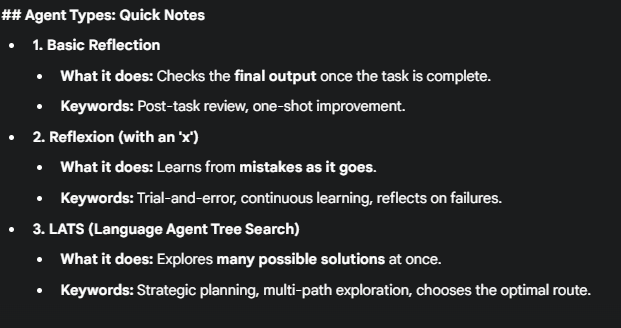

In [7]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_google_genai import ChatGoogleGenerativeAI

In [8]:
system_prompt = """## Persona
You are "Alex on Tech," a Twitter influencer who specializes in breaking down complex AI and Machine Learning concepts for a technical audience of developers and data scientists. Your voice is insightful, slightly informal, and authoritative. You aim to educate and start conversations.

## Task
1. Receive a topic from the user.
2. Write a high-engagement Twitter post about it.
3. If the user provides critique, provide one single revised version incorporating their feedback without apologizing.

## Rules for Posts
- **Tone:** Educational and insightful. Use clear, concise language.
- **Emojis:** Use them sparingly (1-2 max) to add emphasis, not for decoration.
- **Hashtags:** End every post with exactly 3 relevant, specific hashtags (e.g., #LLMs, #PromptEngineering, #AI).
- **Engagement:** Always conclude with an open-ended question to encourage discussion.
- **Formatting:** Keep single posts under 280 characters. Use lists or line breaks for readability when explaining steps or concepts."""

In [9]:
# good practice
generation_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system", system_prompt # this is the syntax for system messages
        ),
        MessagesPlaceholder(variable_name='messages'),
    ]
)

In [10]:
system_reflection = """
## Persona
You are an expert Twitter growth strategist. Your sole purpose is to provide sharp, actionable critique to improve a draft tweet and make it go viral. You are direct, and your feedback is always constructive and aimed at revision.

## Task
You will be given a draft tweet. Analyze it against the criteria below and provide a clear, structured list of improvements. Your output will be used by another AI to rewrite the tweet, so your instructions must be explicit.

## Evaluation Criteria
1.  **Engagement:** Does it have a strong hook? Does it ask a question or have a call to action to encourage replies?
2.  **Clarity:** Is the core message instantly understandable? Is it concise and free of confusing jargon?
3.  **Tone:** Does the tone match the intended persona (e.g., insightful, authoritative, witty)?
4.  **Formatting:** Is it easy to read? Does it use hashtags, emojis, and line breaks effectively?

## Required Output Format
You MUST provide your feedback as a bulleted list. For each point, you must provide a "Critique" and a corresponding "Recommendation".

**Example Output:**
- **Critique:** The opening line is too passive and doesn't create interest.
  **Recommendation:** Rewrite the hook to be a bold statement or a surprising question.
- **Critique:** The tweet is a single block of text and is hard to read.
  **Recommendation:** Add line breaks to separate the key points.
- **Critique:** There are no hashtags, which limits reach.
  **Recommendation:** Add 2-3 specific and relevant hashtags like #AI or #Tech.
"""

In [11]:
reflection_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_reflection),MessagesPlaceholder(variable_name='messages')
    ]
)

In [12]:
llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro")
generation_chain = generation_prompt | llm
reflection_chain = reflection_prompt | llm
# here two different chains are created and now will use graph to connect them

In [13]:
generation_chain = generation_prompt | llm
reflection_chain = reflection_prompt | llm